In [1]:
import numpy as np
import pandas
import nsfg
import first
import thinkstats2
import thinkplot

/home/youngdp/anaconda2/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [2]:
"""
Import college data from the 2014-15 academic year.
Change all NaN values to -1, because the .dropna() method wouldn't
work for me and I had trouble dealing with NaN values. This 
data cleaning step will save time later.
"""

college_data = pandas.read_csv('MERGED2014_15_PP.csv', low_memory=False)
na_vals = ['NaN', 'nan']
college_data.replace(na_vals, -1, inplace=True)

In [3]:
"""
For the sake of generating graphs later, we only want to keep schools that 
have full information on the data we want.
"""

college_data = college_data[college_data['SAT_AVG'] > -1]
college_data = college_data[college_data['ACTCMMID'] > -1]

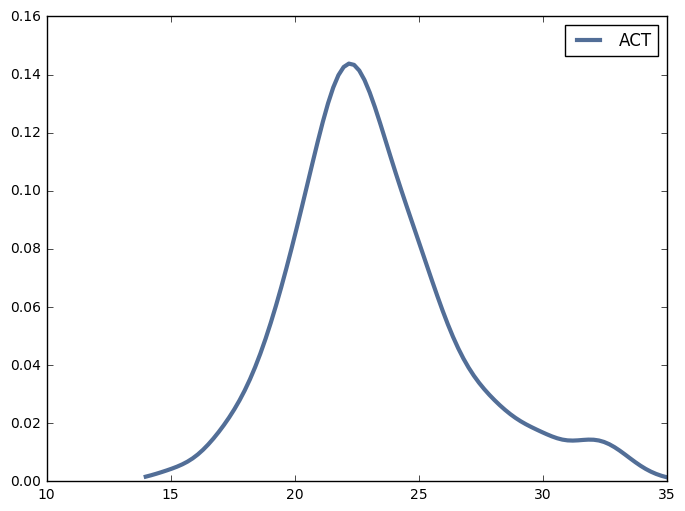

In [10]:
"""
We can graph both SAT scores and ACT scores.
"""
act = college_data['ACTCMMID']
sat = college_data['SAT_AVG']

pdf = thinkstats2.EstimatedPdf(act, label="ACT")
pdf2 = thinkstats2.EstimatedPdf(sat, label="SAT")
thinkplot.Pdf(pdf)
thinkplot.Show()

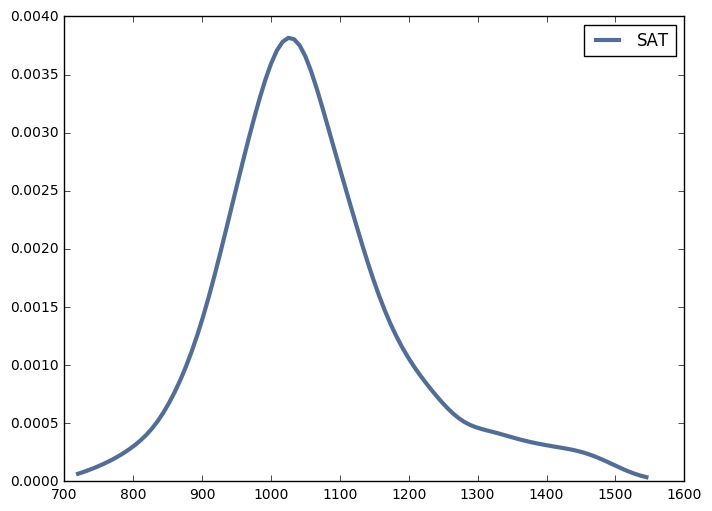

In [12]:
thinkplot.Pdf(pdf2)
thinkplot.Show()

In [6]:
"""
The question we wish to answer relates to regional differences in ACT/SAT performance.
So, we should separate the colleges by regions. Region 4 corresponds to the Midwest.
"""

midwest = college_data[college_data['REGION'] == 4]
other = college_data[college_data['REGION'] != 4]

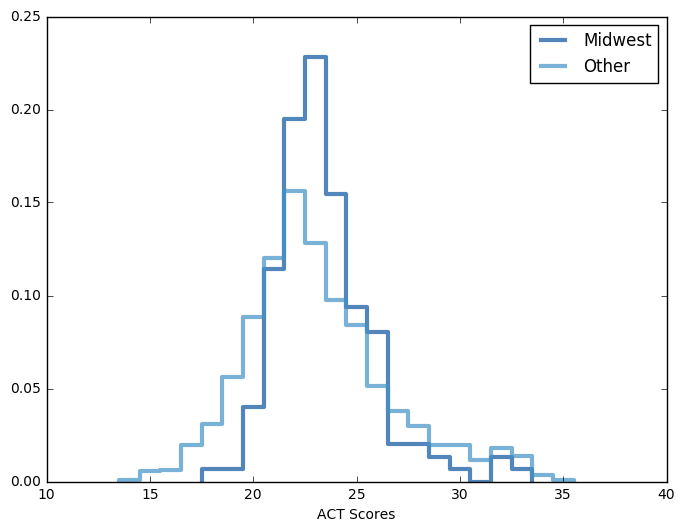

('Midwest mean ACT:', 23.476510067114095)
('Other areas mean ACT', 23.16696750902527)


In [16]:
"""
We can now do a preliminary check on our data and see if there are any immediate differences
in test scores between the Midwest and other regions.
"""

midwest_ratio2 = midwest['ACTCMMID']
other_ratio2 = other['ACTCMMID']

pmf = thinkstats2.Pmf(midwest_ratio2, label="Midwest")
pmf2 = thinkstats2.Pmf(other_ratio2, label="Other")

thinkplot.PrePlot(2)
thinkplot.Pmfs([pmf, pmf2])
thinkplot.Show(xlabel="ACT Scores")

print("Midwest mean ACT:", midwest_ratio2.mean())
print("Other areas mean ACT", other_ratio2.mean())

The first thing that stands out is that schools in the Midwest appear to have ACT scores that have are on average higher. Midwestern schools seemed to be skewed to the right more than non-Midwestern schools.
We cannot draw many conclusions from this graph. However, it does seem to suggest that Midwestern schools score higher on the ACT. It might be interesting to compare
the ratio of ACT / SAT scores in the two regions.

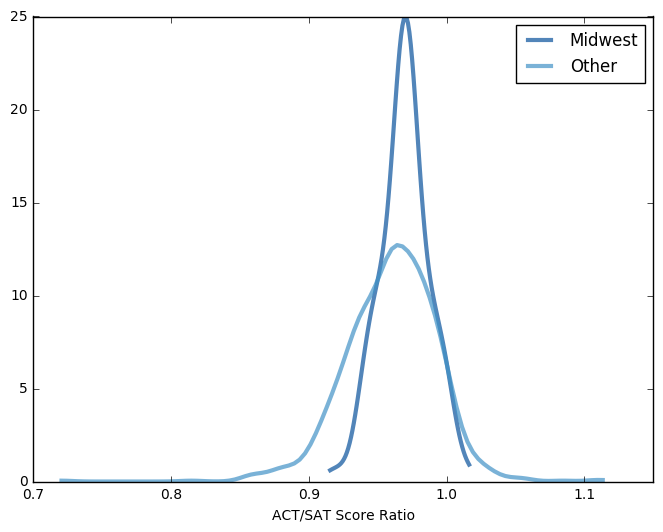

('Midwest mean ACT/SAT ratio:', 0.969423371355676)
('Other areas mean ACT/SAT ratio:', 0.9599805248794467)


In [8]:
"""
We can use a KDE to produced smoothed histograms of ACT/SAT score ratios.
Note that I multiplied ACT scores by 44.44 since SAT scores are on the scale 
of 400-1600, while ACT scores range from 4 to 36. I will discuss this later.
"""
midwest_ratio = midwest['ACTCMMID'] * 44.4 / midwest['SAT_AVG']
other_ratio = other['ACTCMMID'] * 44 / other['SAT_AVG']

pdf = thinkstats2.EstimatedPdf(midwest_ratio, label="Midwest")
pdf2 = thinkstats2.EstimatedPdf(other_ratio, label="Other")

thinkplot.PrePlot(2)
thinkplot.Pdfs([pdf, pdf2])
thinkplot.Show(xlabel="ACT/SAT Score Ratio")

print("Midwest mean ACT/SAT ratio:", midwest_ratio.mean())
print("Other areas mean ACT/SAT ratio:", other_ratio.mean())

A few things stand out from this graph. Schools in the "other" category have a wider distribution of scores, which makes sense considering there are about 7 times as many schools in this category. 
Second, it appears that Midwest areas have a slightly higher ratio (0.9694 compared to 0.9600). We are not yet sure whether this is statistically significant. However, from the model it appears that the non-midwest schools' ratios are skewed left. 

In [9]:
"""
We can use Cohen's effect to get a more quantitative answer as to what the
differences in ACT/SAT score ratios are like.
"""

print(thinkstats2.CohenEffectSize(midwest_ratio, other_ratio))

0.29820432451


The ratio is clearly positive and slight but noticeable. 

Although we can't determine any causation effects, we can draw inferences on what causes such distributions in the models. It could be that students applying to Midwestern schools (which might be Midwestern students) spend more time studying for the ACT than for the SAT. (It's also worth noting that our model only includes schools that accept both the ACT and SAT). The longer left tail of non-Midwestern schools might be explained by the fact that many students outside the Midwest primarily study for the SAT and only take the ACT out of curiosity, whim, or hope.